# Importing Libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from math import sqrt
import numpy as np 
import pandas as pd 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
from pandas.plotting import lag_plot
from datetime import datetime
import time
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.pipeline import make_pipeline
import numpy as np
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout, SimpleRNN, GRU, Bidirectional
from pickle import load
from pandas.plotting import lag_plot
from pandas import DataFrame
from pandas import concat
import mplfinance as mpf
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten

ModuleNotFoundError: No module named 'mplfinance'

In [2]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

# Importing Dataset

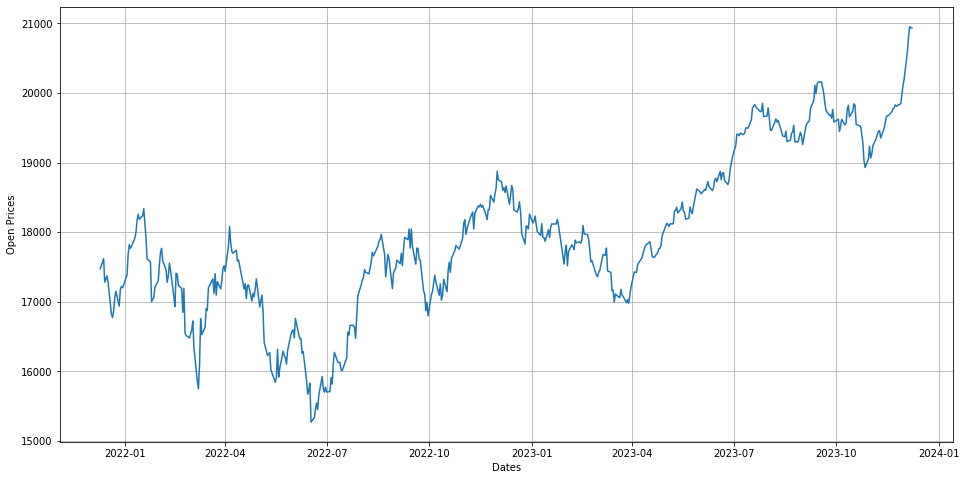

In [3]:
dateparse = lambda dates: pd.to_datetime(dates, format='%Y-%m-%d')
data = pd.read_csv('^NSEI.csv', sep=',', parse_dates=['Date'], index_col='Date', date_parser=dateparse)
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open']);

# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 495 entries, 2021-12-10 to 2023-12-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       495 non-null    float64
 1   High       495 non-null    float64
 2   Low        495 non-null    float64
 3   Close      495 non-null    float64
 4   Adj Close  495 non-null    float64
 5   Volume     495 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.1 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-10,17476.050781,17534.349609,17405.250000,17511.300781,17511.300781,204500
2021-12-13,17619.099609,17639.500000,17355.949219,17368.250000,17368.250000,256600
2021-12-14,17283.199219,17376.199219,17225.800781,17324.900391,17324.900391,271000
2021-12-15,17323.650391,17351.199219,17192.199219,17221.400391,17221.400391,215000
2021-12-16,17373.000000,17379.349609,17184.949219,17248.400391,17248.400391,219500


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-04,20601.949219,20702.650391,20507.750000,20686.800781,20686.800781,381100
2023-12-05,20808.900391,20864.050781,20711.150391,20855.099609,20855.099609,421000
2023-12-06,20950.750000,20961.949219,20852.150391,20937.699219,20937.699219,359200
2023-12-07,20932.400391,20941.250000,20850.800781,20901.150391,20901.150391,275000
2023-12-08,20934.099609,21006.099609,20862.699219,20969.400391,20969.400391,292400


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,17952.885863,18030.706747,17850.893906,17945.408615,17945.408615,268865.858586
std,1160.415793,1142.666938,1177.201880,1161.729638,1161.729638,77547.242921
min,15272.650391,15382.500000,15183.400391,15293.500000,15293.500000,0.000000
25%,17193.375000,17302.299805,17070.875000,17202.375000,17202.375000,225250.000000
50%,17811.599609,17898.699219,17723.699219,17812.699219,17812.699219,256500.000000
75%,18700.950195,18747.674805,18634.450195,18693.649414,18693.649414,291950.000000
max,20950.750000,21006.099609,20862.699219,20969.400391,20969.400391,696500.000000


In [8]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Data Visulization

No handles with labels found to put in legend.


          t-1       t+1
t-1  1.000000  0.244476
t+1  0.244476  1.000000


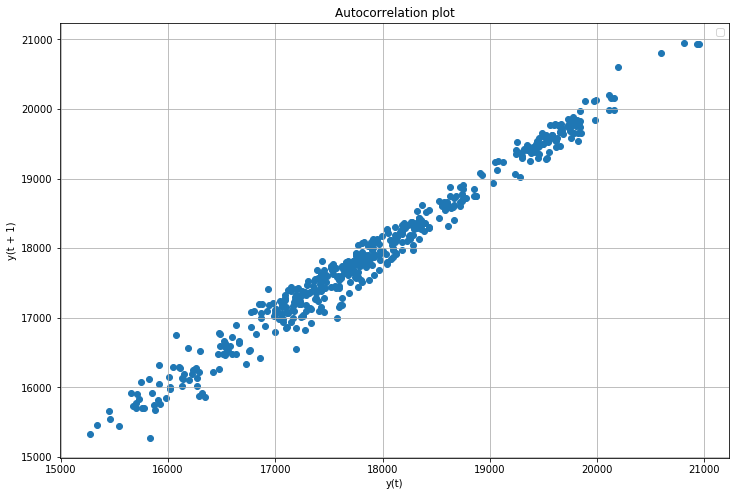

In [9]:

plt.figure(figsize=(12,8))
lag_plot(data['Open'], lag=1)
plt.title('Autocorrelation plot')
plt.grid(True)
plt.legend();


values = DataFrame(data['Open'].values)
dataframe = concat([values.shift(120), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

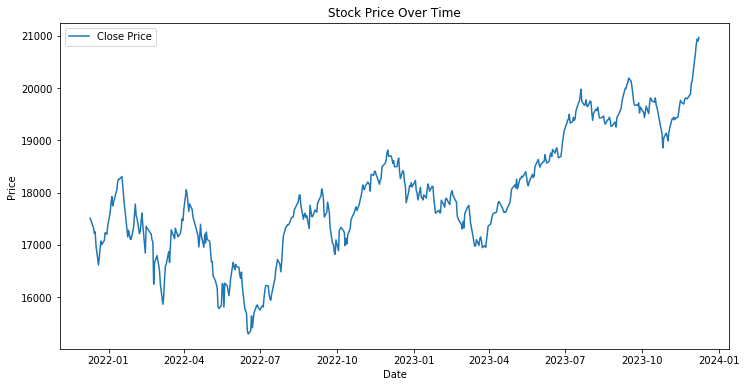

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()

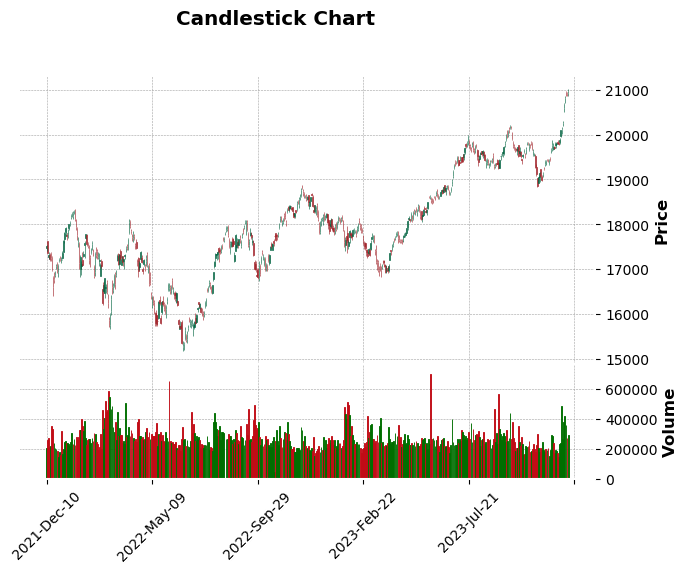

In [11]:
mpf.plot(data, type='candle', style='charles', title='Candlestick Chart', volume=True)

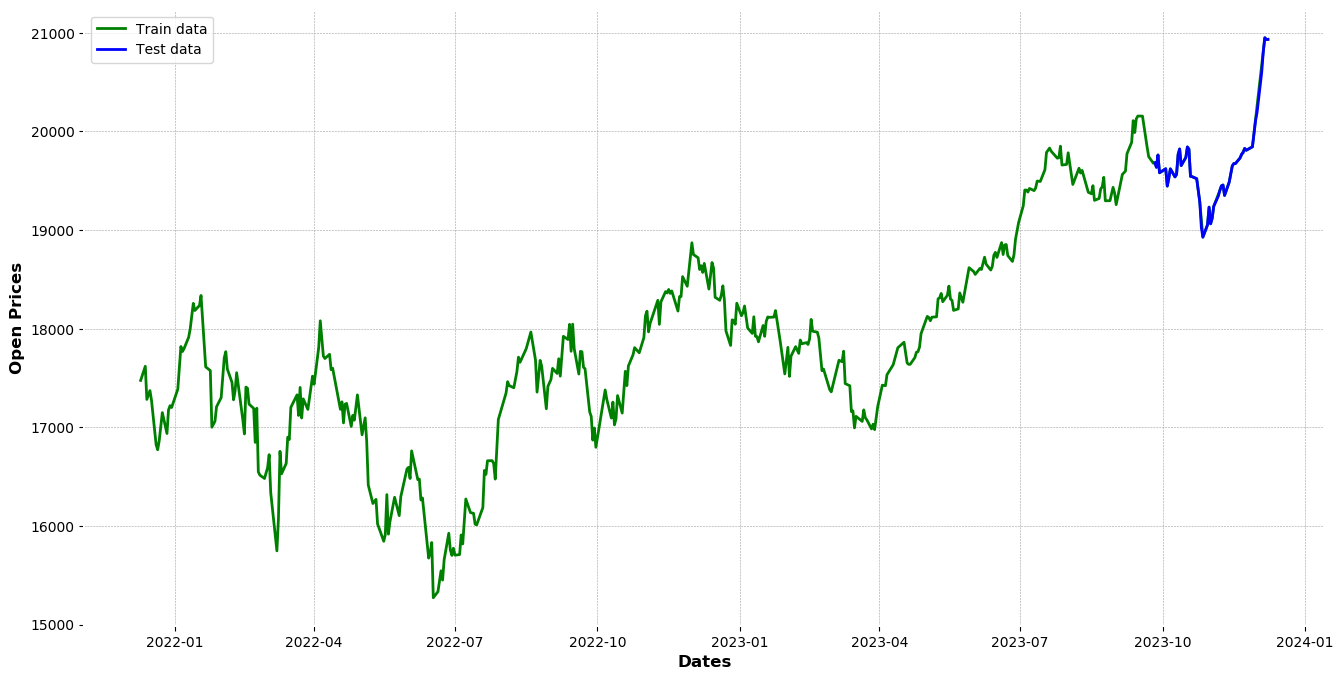

In [12]:
train_data, test_data = data[0:int(len(data)*0.9)], data[int(len(data)*0.9):]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'], 'green', label='Train data')
plt.plot(test_data['Open'], 'blue', label='Test data')
plt.legend()

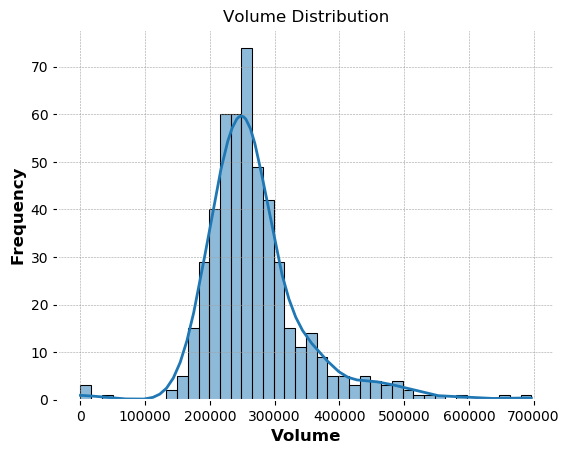

In [13]:
sns.histplot(data['Volume'], kde=True)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Volume Distribution')
plt.show()

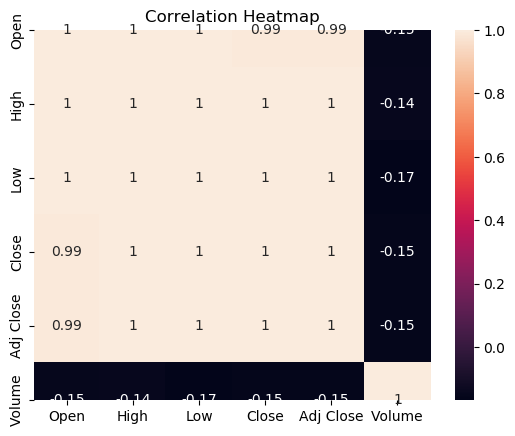

In [14]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

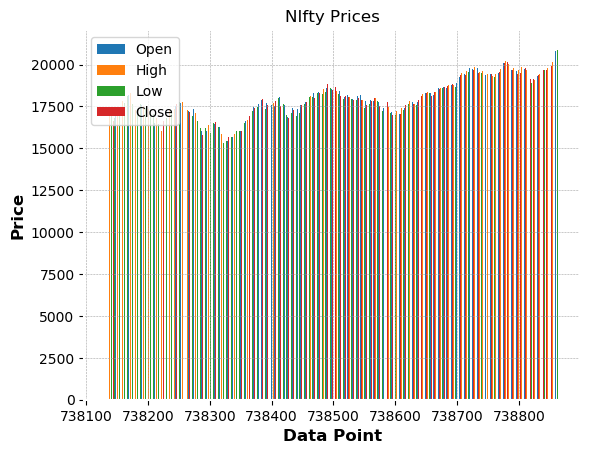

In [15]:
df = data
x = mdates.date2num(df.index)

width = 0.2  # Adjust the width as needed

plt.bar(x - width, df['Open'], width=width, label='Open')
plt.bar(x, df['High'], width=width, label='High')
plt.bar(x + width, df['Low'], width=width, label='Low')
plt.bar(x + 2 * width, df['Close'], width=width, label='Close')

plt.xlabel('Data Point')
plt.ylabel('Price')
plt.title('NIfty Prices')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Price Distribution')

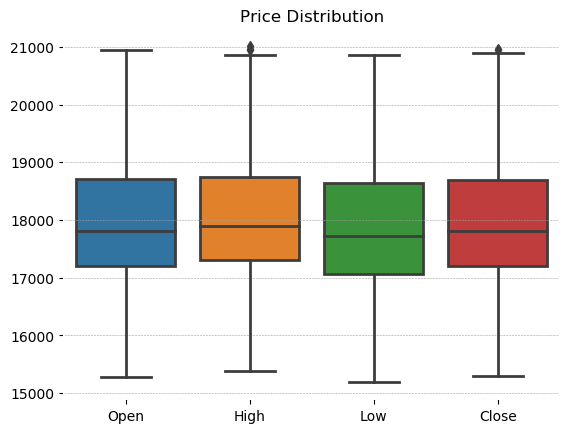

In [16]:
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Price Distribution')

# Model Building 

In [17]:
train = train_data.iloc[:, 0:1].values 
scaler = MinMaxScaler() 
train_scaled = scaler.fit_transform(train)
timesteps = 7
X_train = []
y_train = []
for i in range(timesteps, train.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0]) 
    y_train.append(train_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
test = test_data.iloc[:, 0:1].values 
scaler = MinMaxScaler() 
test_scaled = scaler.fit_transform(test)
timesteps = 7
X_test = []
y_test = []
for i in range(timesteps, test.shape[0]):
    X_test.append(test_scaled[i-timesteps:i, 0]) 
    y_test.append(test_scaled[i, 0]) 
X_test, y_test = np.array(X_test), np.array(y_test)

# Machine Learning

# SVM

In [19]:
model = SVR()
model.fit(X_train, y_train)

SVR()

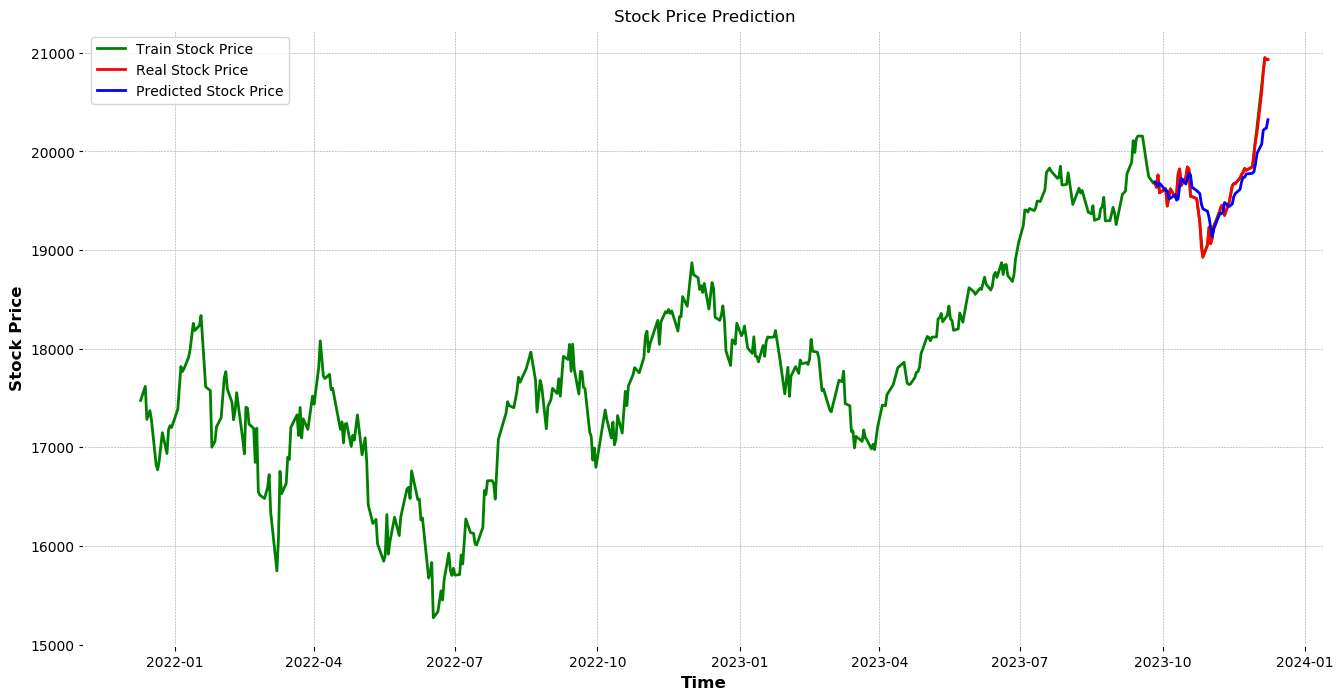

In [20]:
real_stock_price = test_data.iloc[:, 0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis=0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0] + timesteps):
    X_test.append(test_inputs[i - timesteps:i, 0])

X_test = np.array(X_test)


X_test = X_test.reshape(X_test.shape[0], timesteps)

predicted_stock_price = model.predict(X_test)


predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16, 8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Train Stock Price')
plt.plot(test_data.index, real_stock_price, color='red', label='Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse))
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse))
r2 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r2))

MSE: 63669.43744750854
MAE: 171.71268271566717
RMSE: 252.32803539739405
R2 Score: 0.7058728748209436


# KNN

In [22]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

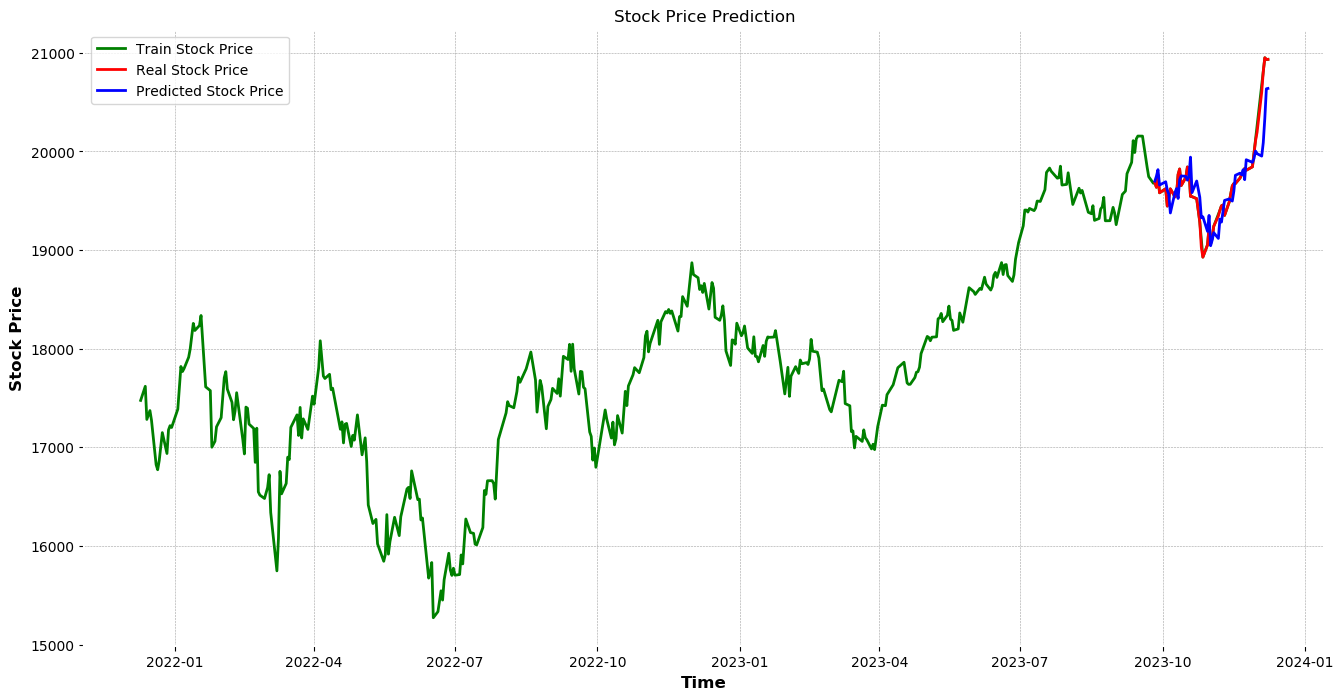

In [23]:
real_stock_price = test_data.iloc[:, 0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis=0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0] + timesteps):
    X_test.append(test_inputs[i - timesteps:i, 0])

X_test = np.array(X_test)


X_test = X_test.reshape(X_test.shape[0], timesteps)

predicted_stock_price = knn.predict(X_test)


predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16, 8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Train Stock Price')
plt.plot(test_data.index, real_stock_price, color='red', label='Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
mse1 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse1))
mae1 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae1))
rmse1 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse1))
r21 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r21))

MSE: 50132.48036019214
MAE: 156.6750784376089
RMSE: 223.9028368739265
R2 Score: 0.7684081575466186


# Decision Tree

In [25]:
DT = DecisionTreeRegressor(random_state=0)
DT.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

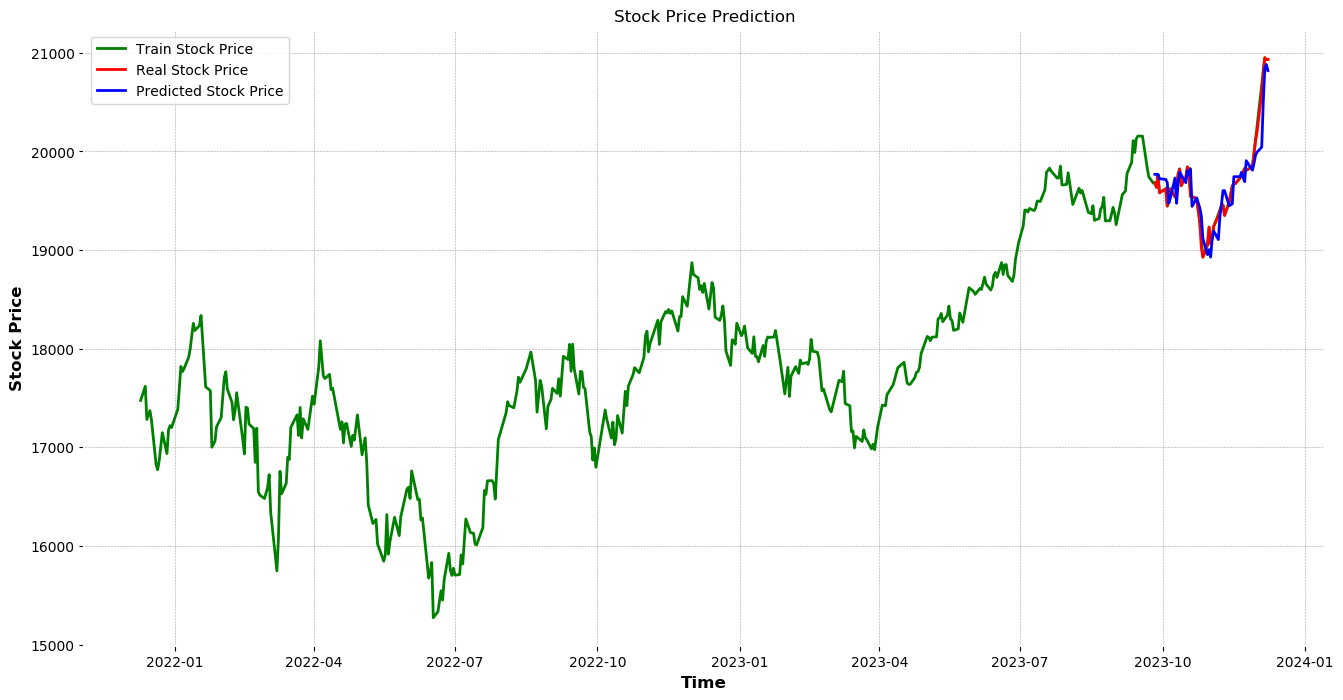

In [26]:
real_stock_price = test_data.iloc[:, 0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis=0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0] + timesteps):
    X_test.append(test_inputs[i - timesteps:i, 0])

X_test = np.array(X_test)


X_test = X_test.reshape(X_test.shape[0], timesteps)

predicted_stock_price = DT.predict(X_test)


predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16, 8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Train Stock Price')
plt.plot(test_data.index, real_stock_price, color='red', label='Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
mse2 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse2))
mae2 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae2))
rmse2 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse2))
r22 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r22))

MSE: 24952.843261739832
MAE: 121.0447580543258
RMSE: 157.9646899206903
R2 Score: 0.8847279268067992


# Random Forest

In [28]:
RF = RandomForestRegressor(max_depth=2, random_state=0)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

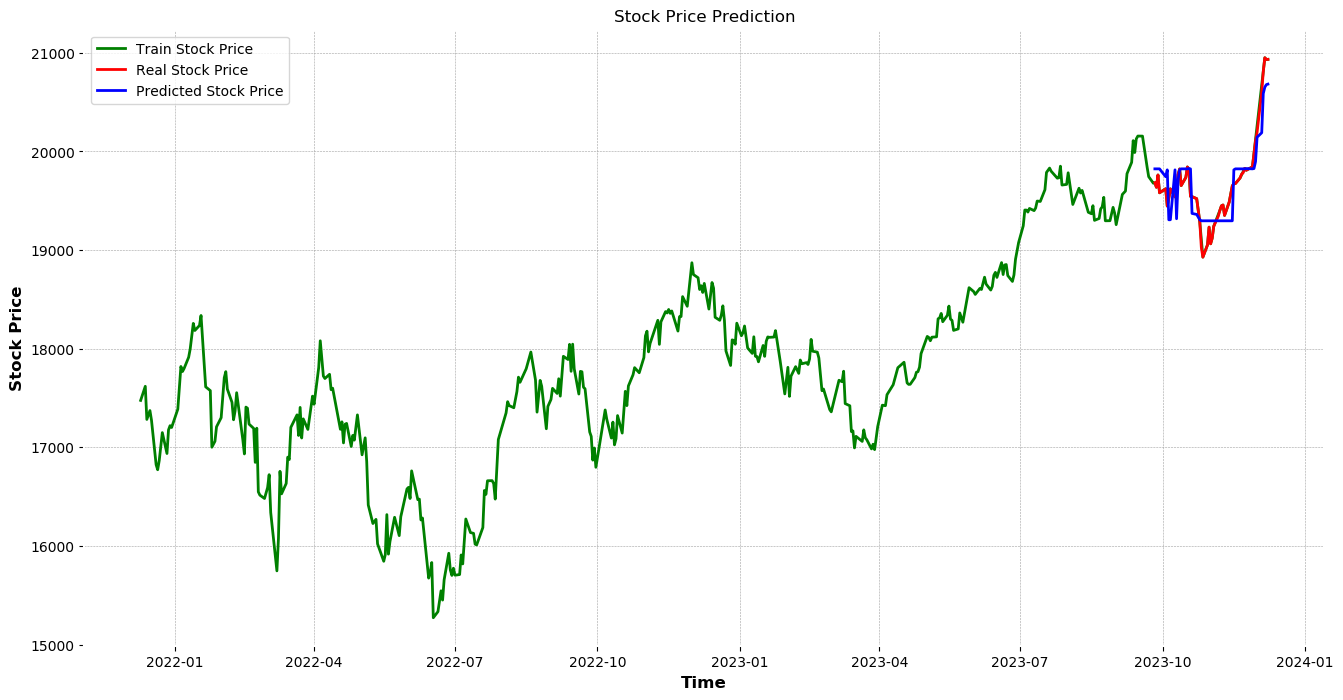

In [29]:
real_stock_price = test_data.iloc[:, 0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis=0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0] + timesteps):
    X_test.append(test_inputs[i - timesteps:i, 0])

X_test = np.array(X_test)


X_test = X_test.reshape(X_test.shape[0], timesteps)

predicted_stock_price = RF.predict(X_test)


predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16, 8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Train Stock Price')
plt.plot(test_data.index, real_stock_price, color='red', label='Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
mse3 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse3))
mae3 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae3))
rmse3 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse3))
r23 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r23))

MSE: 37375.635649165924
MAE: 159.81406444716586
RMSE: 193.3277932661673
R2 Score: 0.8273396356879669


# Extreme Gradient Boosting

In [31]:
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

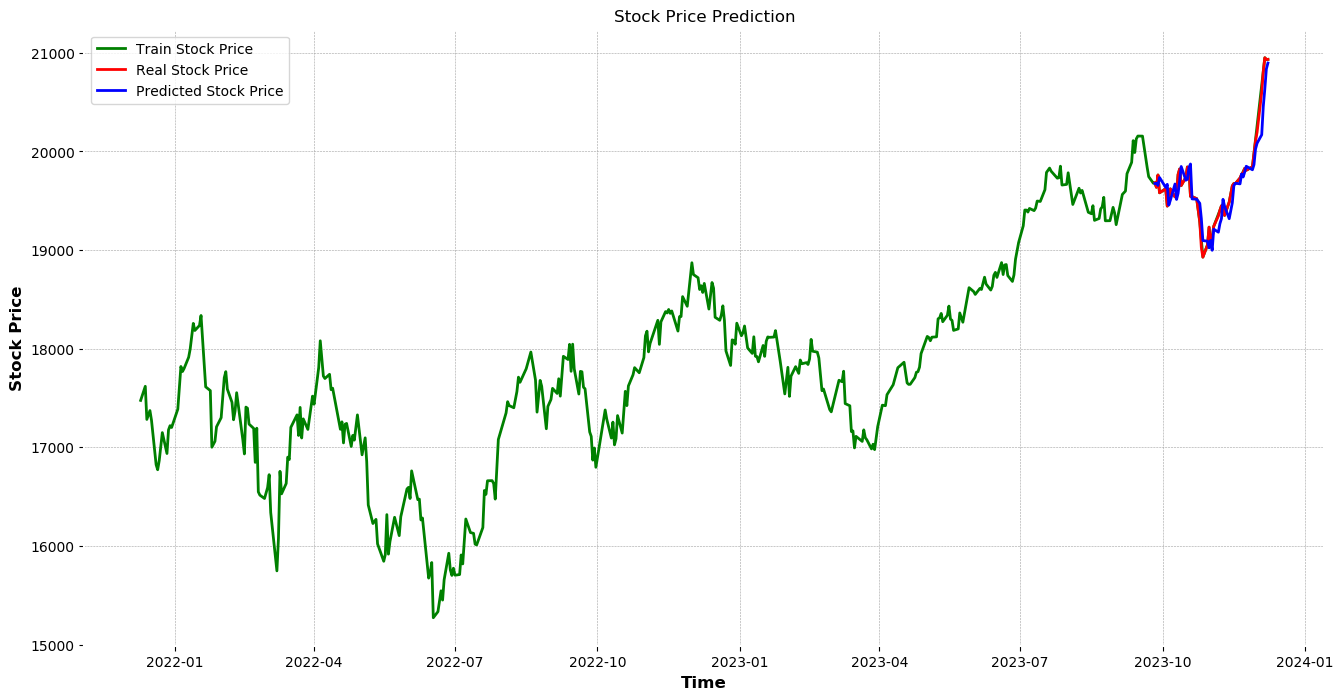

In [32]:
real_stock_price = test_data.iloc[:, 0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis=0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0] + timesteps):
    X_test.append(test_inputs[i - timesteps:i, 0])

X_test = np.array(X_test)


X_test = X_test.reshape(X_test.shape[0], timesteps)

predicted_stock_price = gb.predict(X_test)


predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16, 8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Train Stock Price')
plt.plot(test_data.index, real_stock_price, color='red', label='Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
mse4 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse4))
mae4 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae4))
rmse4 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse4))
r24 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r24))

MSE: 22917.14761346061
MAE: 114.41006586921576
RMSE: 151.38410621151948
R2 Score: 0.8941320197715206


# AdaBoost

In [34]:
ada = AdaBoostRegressor(random_state=0, n_estimators=100)
ada.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

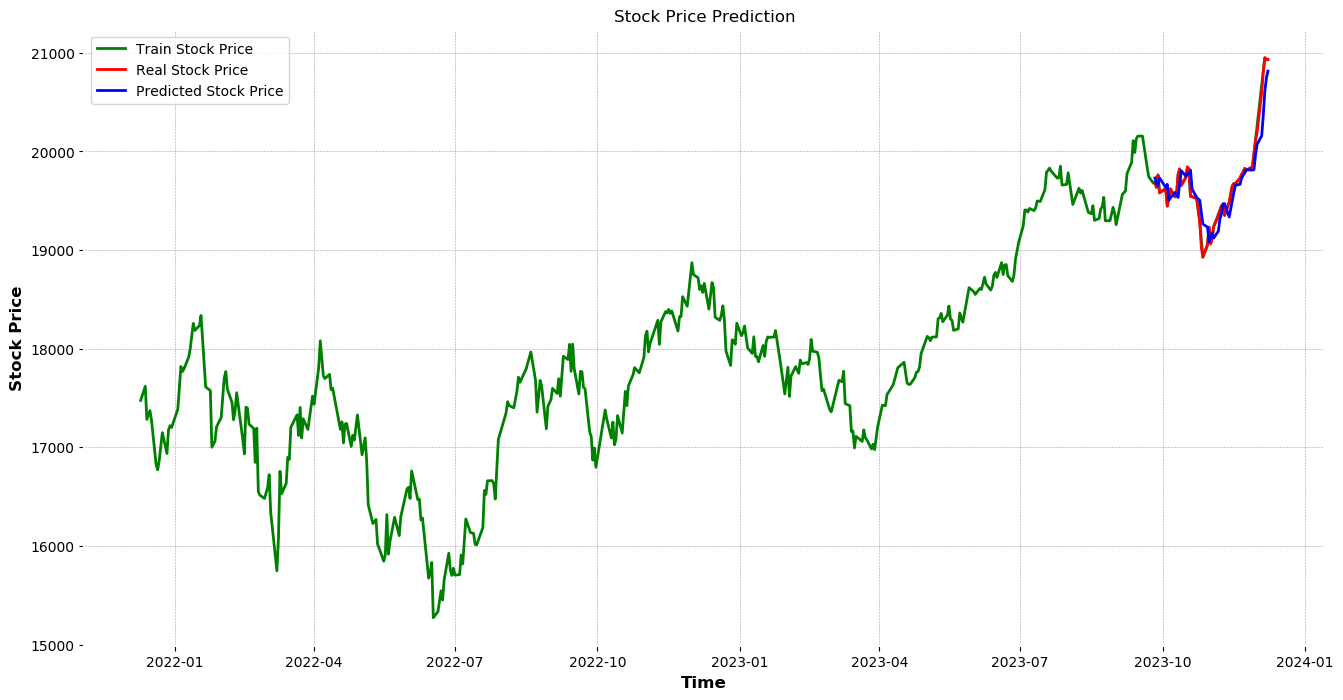

In [35]:
real_stock_price = test_data.iloc[:, 0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis=0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0] + timesteps):
    X_test.append(test_inputs[i - timesteps:i, 0])

X_test = np.array(X_test)


X_test = X_test.reshape(X_test.shape[0], timesteps)

predicted_stock_price = ada.predict(X_test)


predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16, 8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Train Stock Price')
plt.plot(test_data.index, real_stock_price, color='red', label='Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
mse5 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse5))
mae5 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae5))
rmse5 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse5))
r25 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r25))

MSE: 27526.28071440951
MAE: 125.08020191957097
RMSE: 165.9104599306792
R2 Score: 0.8728396835597017


# Naive Bayes

In [37]:
br = linear_model.BayesianRidge()
br.fit(X_train, y_train)

BayesianRidge()

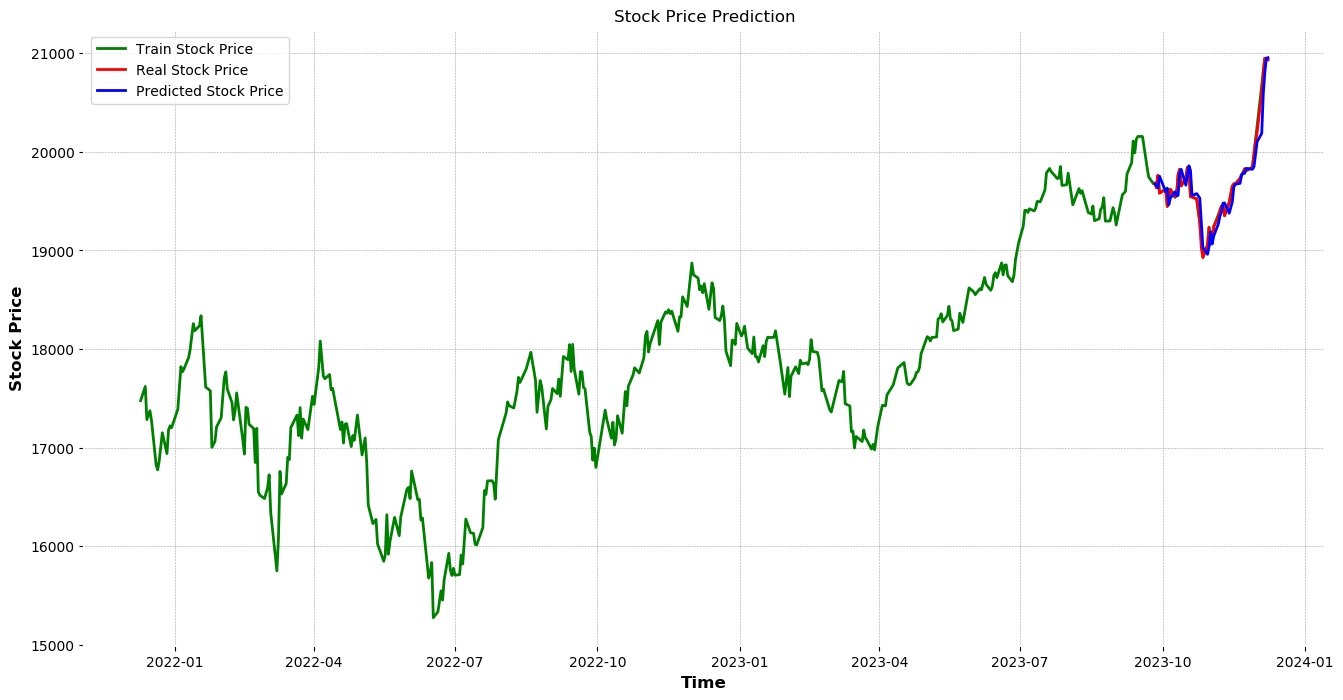

In [38]:
real_stock_price = test_data.iloc[:, 0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis=0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0] + timesteps):
    X_test.append(test_inputs[i - timesteps:i, 0])

X_test = np.array(X_test)


X_test = X_test.reshape(X_test.shape[0], timesteps)

predicted_stock_price = br.predict(X_test)


predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16, 8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Train Stock Price')
plt.plot(test_data.index, real_stock_price, color='red', label='Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
mse6 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse6))
mae6 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae6))
rmse6 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse6))
r26 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r26))

MSE: 16580.060556127737
MAE: 97.03063392062657
RMSE: 128.7635839673925
R2 Score: 0.9234068064337932


# Linear Regression

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

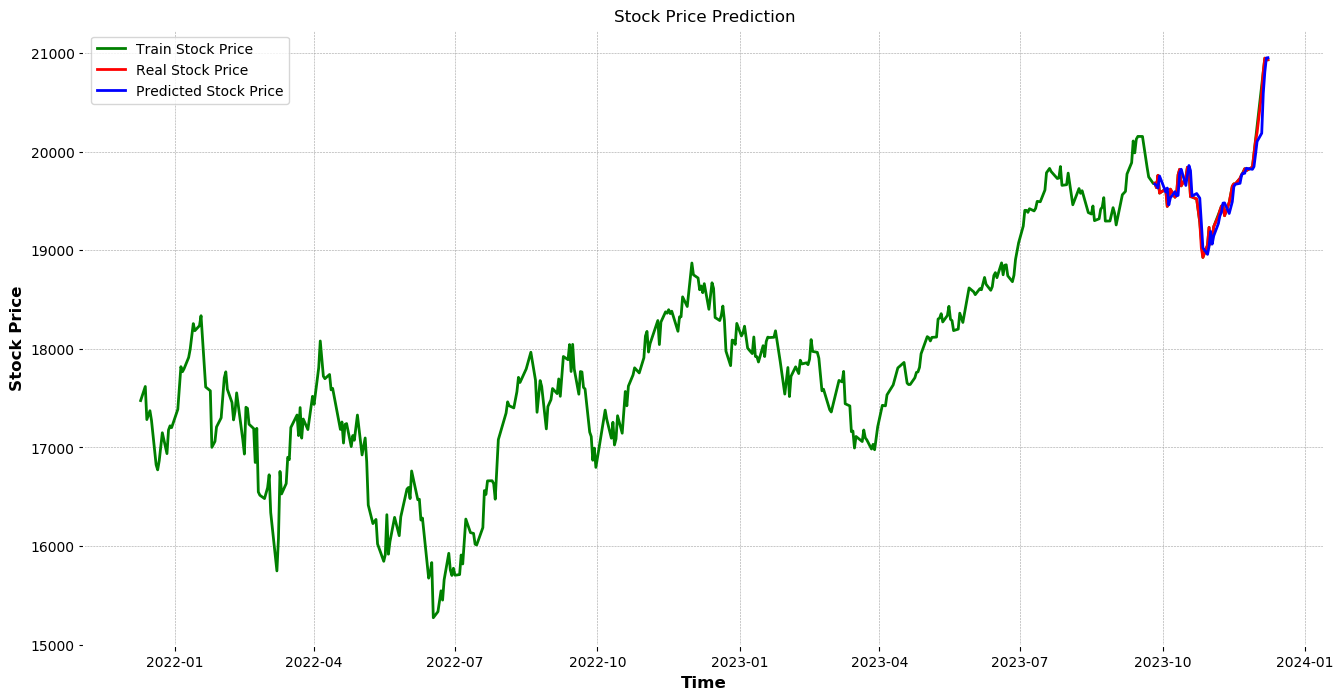

In [41]:
real_stock_price = test_data.iloc[:, 0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis=0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0] + timesteps):
    X_test.append(test_inputs[i - timesteps:i, 0])

X_test = np.array(X_test)


X_test = X_test.reshape(X_test.shape[0], timesteps)

predicted_stock_price = lr.predict(X_test)


predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16, 8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Train Stock Price')
plt.plot(test_data.index, real_stock_price, color='red', label='Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
mse7 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse7))
mae7 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae7))
rmse7 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse7))
r27 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r27))

MSE: 16410.09185443379
MAE: 96.6020116983103
RMSE: 128.10188076072026
R2 Score: 0.9241919932927296


# ANN

In [43]:
ann = MLPRegressor(random_state=1, max_iter=500)
ann.fit(X_train, y_train)

MLPRegressor(max_iter=500, random_state=1)

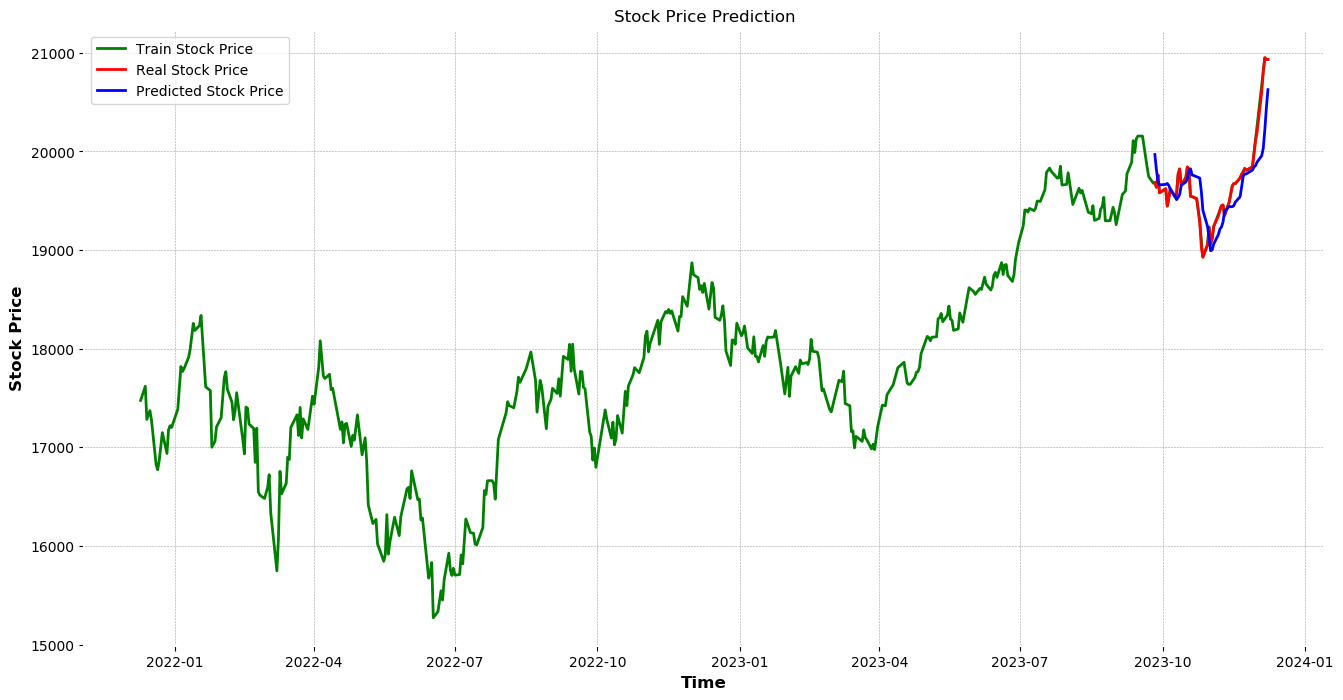

In [44]:
real_stock_price = test_data.iloc[:, 0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis=0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0] + timesteps):
    X_test.append(test_inputs[i - timesteps:i, 0])

X_test = np.array(X_test)


X_test = X_test.reshape(X_test.shape[0], timesteps)

predicted_stock_price = ann.predict(X_test)


predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16, 8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Train Stock Price')
plt.plot(test_data.index, real_stock_price, color='red', label='Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
mse8 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse8))
mae8 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae8))
rmse8 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse8))
r28 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r28))

MSE: 75222.51242873831
MAE: 204.62437010217045
RMSE: 274.26722813478517
R2 Score: 0.652502327389789


# Voting Classifier

In [46]:
regressor1 = RandomForestRegressor()
regressor2 = GradientBoostingRegressor()
regressor3 = LinearRegression()

# Create a voting regressor
voting_regressor = VotingRegressor(estimators=[('rf', regressor1), ('gb', regressor2), ('lr', regressor3)])

# Fit the ensemble model
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('gb', GradientBoostingRegressor()),
                            ('lr', LinearRegression())])

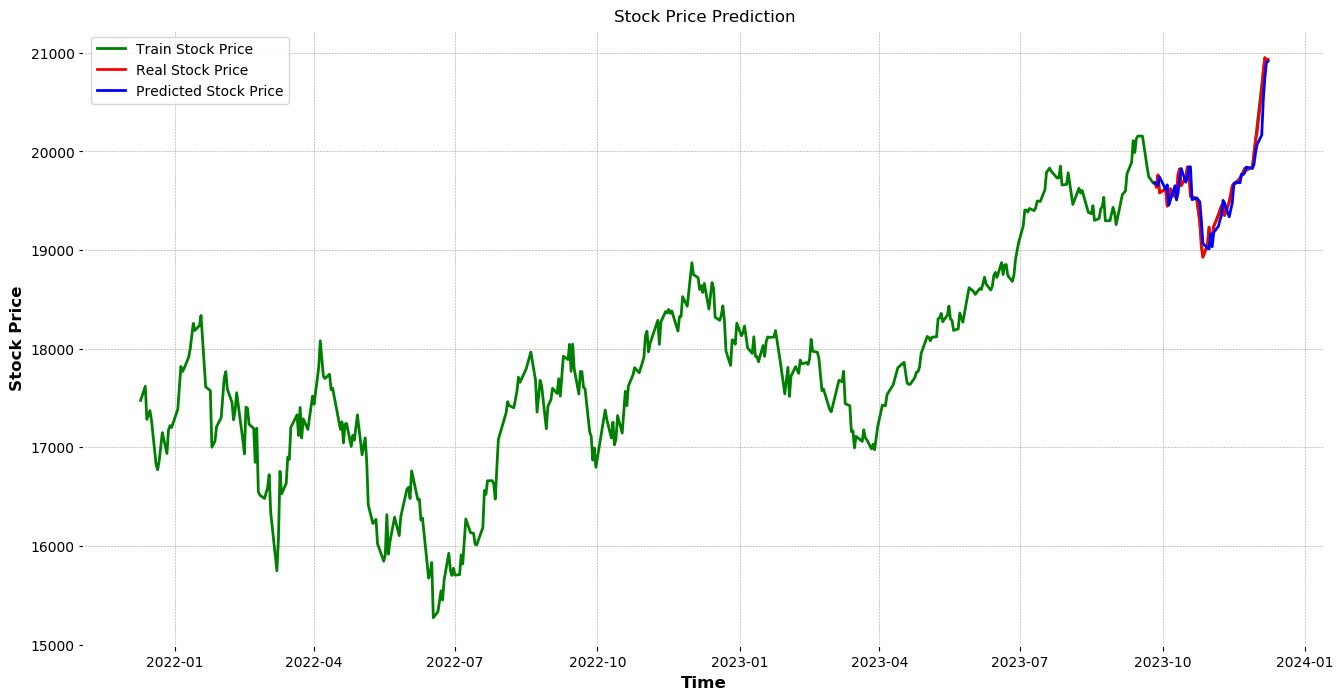

In [47]:
real_stock_price = test_data.iloc[:, 0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis=0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0] + timesteps):
    X_test.append(test_inputs[i - timesteps:i, 0])

X_test = np.array(X_test)


X_test = X_test.reshape(X_test.shape[0], timesteps)

predicted_stock_price = voting_regressor.predict(X_test)


predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16, 8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Train Stock Price')
plt.plot(test_data.index, real_stock_price, color='red', label='Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
mse9 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse9))
mae9 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae9))
rmse9 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse9))
r29 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r29))

MSE: 19364.80133156853
MAE: 105.82300561625307
RMSE: 139.1574695500336
R2 Score: 0.9105424270473008


# Stacking Classifier

In [49]:
regressor1 = RandomForestRegressor(random_state=42)
regressor2 = GradientBoostingRegressor(random_state=42)
regressor3 = LinearRegression()

# Create a stacking regressor
stacked_regressor = StackingRegressor(
    estimators=[('rf', regressor1), ('gb', regressor2), ('lr', regressor3)],
    final_estimator=LinearRegression()
)

# Fit the ensemble model
stacked_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42)),
                              ('lr', LinearRegression())],
                  final_estimator=LinearRegression())

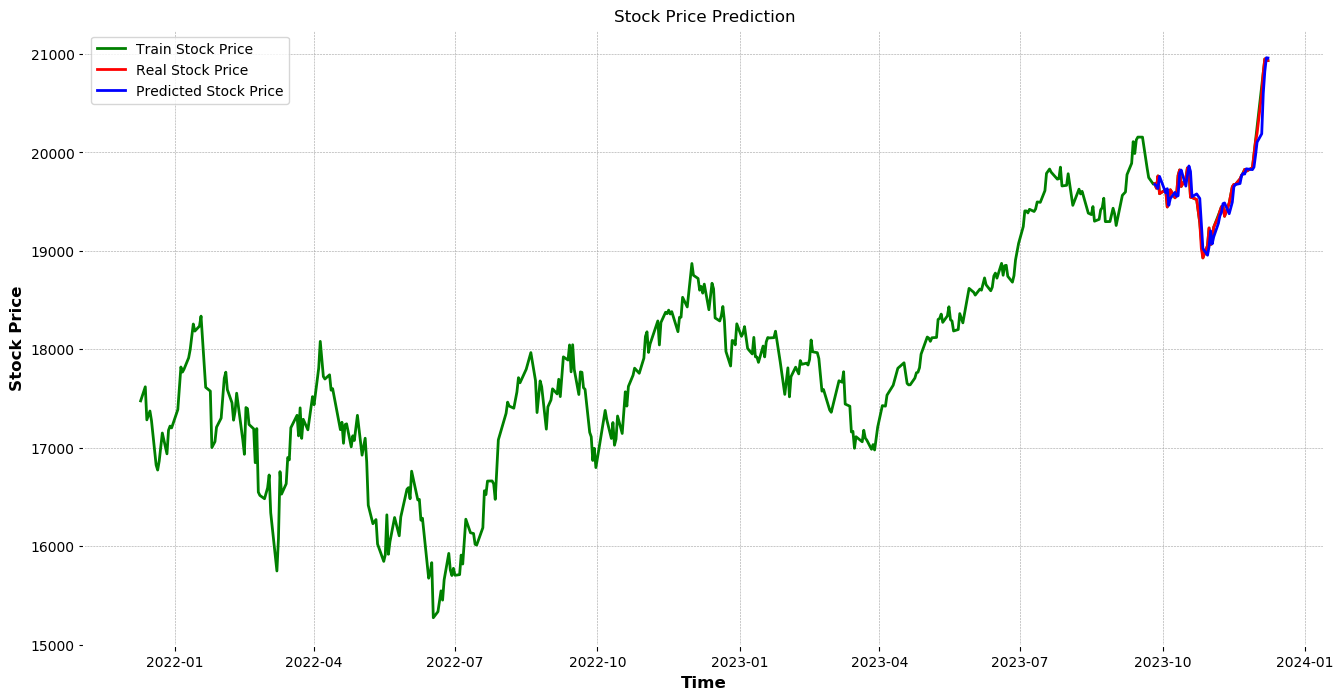

In [50]:
real_stock_price = test_data.iloc[:, 0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis=0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0] + timesteps):
    X_test.append(test_inputs[i - timesteps:i, 0])

X_test = np.array(X_test)


X_test = X_test.reshape(X_test.shape[0], timesteps)

predicted_stock_price = stacked_regressor.predict(X_test)


predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16, 8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label='Train Stock Price')
plt.plot(test_data.index, real_stock_price, color='red', label='Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
mse10 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse10))
mae10 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae10))
rmse10 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse10))
r210 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r210))

MSE: 16228.744209765837
MAE: 95.85765834770092
RMSE: 127.39208848969325
R2 Score: 0.9250297462794457


# Deep Learning

# RNN 

In [52]:
train = train_data.iloc[:, 0:1].values 

In [53]:
scaler = MinMaxScaler() 
train_scaled = scaler.fit_transform(train)

In [54]:
timesteps = 7
X_train = []
y_train = []
for i in range(timesteps, train.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0]) 
    y_train.append(train_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)

In [55]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #Reshaping
from numpy.random import seed 
seed(2019)

In [56]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # Use SimpleRNN

model.add(Dropout(0.20))

model.add(SimpleRNN(units=50, return_sequences=True))  # Use SimpleRNN
model.add(Dropout(0.25))

model.add(SimpleRNN(units=50, return_sequences=True))  # Use SimpleRNN
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50))  # Use SimpleRNN
model.add(Dropout(0.25))

model.add(Dense(units=1))

In [57]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
14/14 [==============================] - 2s 10ms/step - loss: 0.5476
Epoch 2/40
14/14 [==============================] - 0s 9ms/step - loss: 0.3771
Epoch 3/40
14/14 [==============================] - 0s 9ms/step - loss: 0.3003
Epoch 4/40
14/14 [==============================] - 0s 9ms/step - loss: 0.2397
Epoch 5/40
14/14 [==============================] - 0s 9ms/step - loss: 0.1900
Epoch 6/40
14/14 [==============================] - 0s 9ms/step - loss: 0.1743
Epoch 7/40
14/14 [==============================] - 0s 9ms/step - loss: 0.1387A: 0s - loss: 0.140
Epoch 8/40
14/14 [==============================] - 0s 9ms/step - loss: 0.1156
Epoch 9/40
14/14 [==============================] - 0s 9ms/step - loss: 0.1174
Epoch 10/40
14/14 [==============================] - 0s 9ms/step - loss: 0.0936
Epoch 11/40
14/14 [==============================] - 0s 9ms/step - loss: 0.0850
Epoch 12/40
14/14 [==============================] - 0s 9ms/step - loss: 0.0806
Epoch 13/40
14/14 [==========

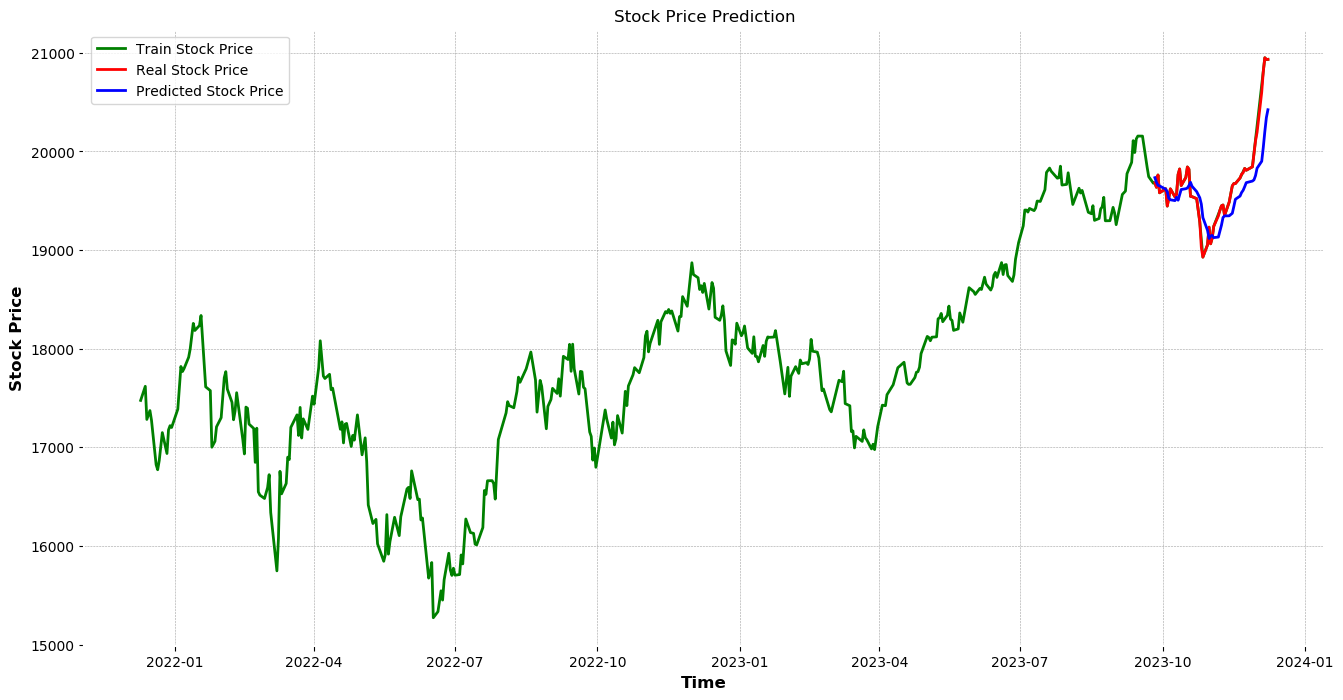

In [58]:
real_stock_price = test_data.iloc[:,0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis = 0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
mse11 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse11))
mae11 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae11))
rmse11 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse11))
r211 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r211))

MSE: 77100.51880058288
MAE: 208.3528515625
RMSE: 277.6698017440551
R2 Score: 0.6438266952912017


## LSTM

In [60]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

model.add(Dropout(0.20))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.25))


model.add(Dense(units = 1))

In [61]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 50)             10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)               

In [62]:
model.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
14/14 [==============================] - 3s 5ms/step - loss: 0.1558
Epoch 2/40
14/14 [==============================] - 0s 5ms/step - loss: 0.0353
Epoch 3/40
14/14 [==============================] - 0s 5ms/step - loss: 0.0205
Epoch 4/40
14/14 [==============================] - 0s 5ms/step - loss: 0.0164
Epoch 5/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0110
Epoch 6/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 7/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 8/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 9/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 10/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0089
Epoch 11/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 12/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0102
Epoch 13/40
14/14 [==============================

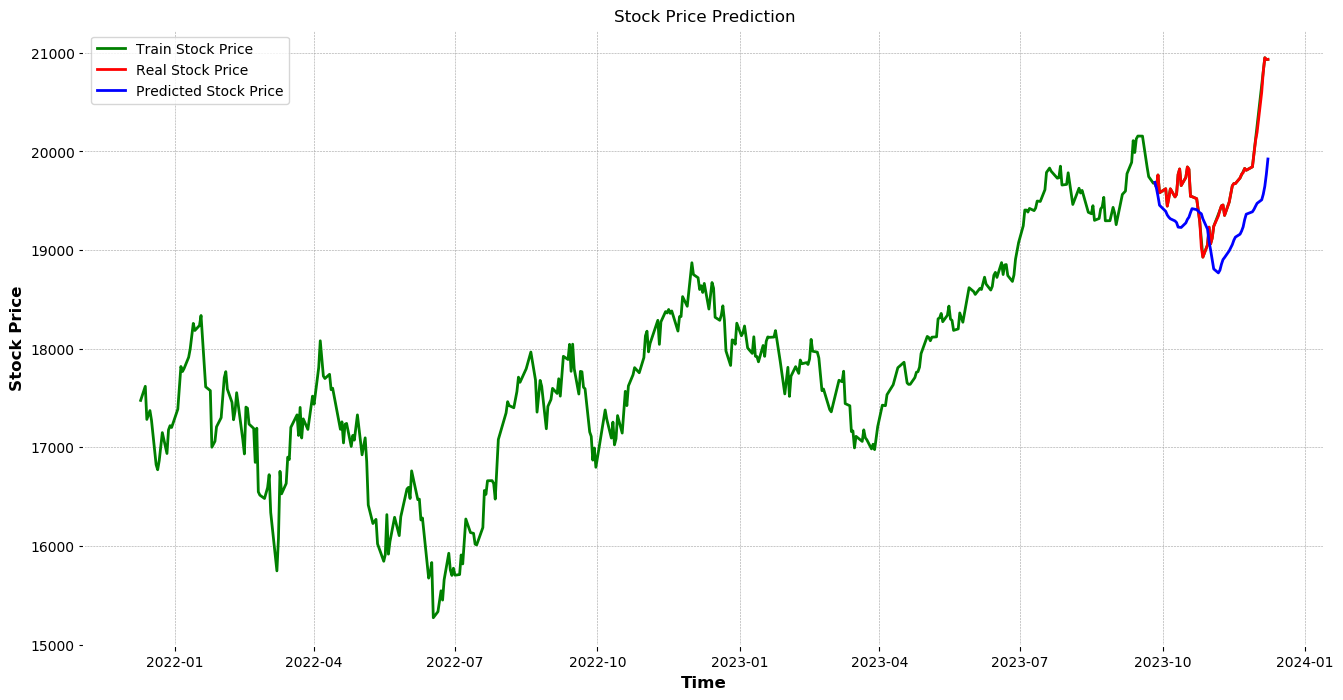

In [63]:
real_stock_price = test_data.iloc[:,0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis = 0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
mse12 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse12))
mae12 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae12))
rmse12 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse12))
r212 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r212))

MSE: 300694.95006103517
MAE: 455.9571875
RMSE: 548.3565902412728
R2 Score: -0.38908940871713393


## GRU

In [65]:
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  

model.add(Dropout(0.20))

model.add(GRU(units=50, return_sequences=True)) 
model.add(Dropout(0.25))

model.add(GRU(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(GRU(units=50))  
model.add(Dropout(0.25))

model.add(Dense(units=1))

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 7, 50)             7950      
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 7, 50)             15300     
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
gru_2 (GRU)                  (None, 7, 50)             15300     
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 50)             0         
_________________________________________________________________
gru_3 (GRU)                  (None, 50)               

In [67]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
14/14 [==============================] - 2s 5ms/step - loss: 0.0937
Epoch 2/40
14/14 [==============================] - 0s 5ms/step - loss: 0.0259
Epoch 3/40
14/14 [==============================] - 0s 5ms/step - loss: 0.0148
Epoch 4/40
14/14 [==============================] - 0s 5ms/step - loss: 0.0113
Epoch 5/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 6/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 7/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0083
Epoch 8/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0083
Epoch 9/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 10/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 11/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0081
Epoch 12/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 13/40
14/14 [==============================

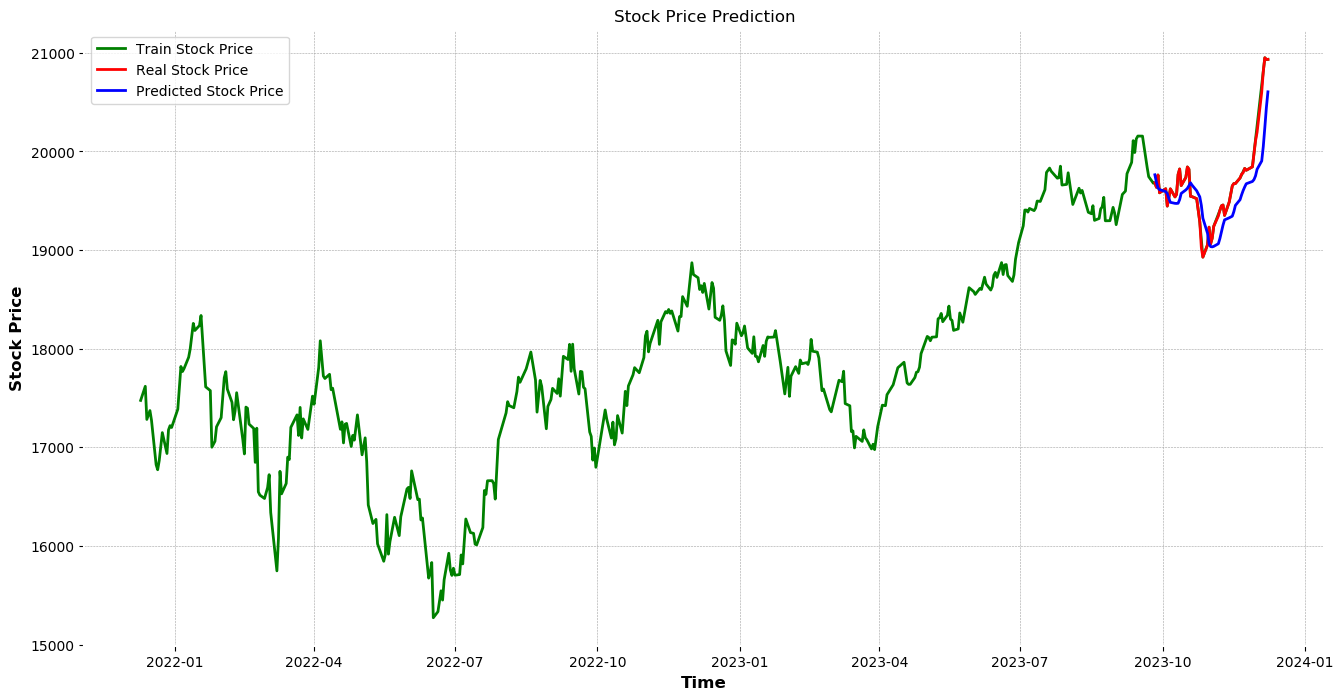

In [68]:
real_stock_price = test_data.iloc[:,0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis = 0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
mse13 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse13))
mae13 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae13))
rmse13 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse13))
r213 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r213))

MSE: 77281.10681587219
MAE: 221.4486328125
RMSE: 277.994796382724
R2 Score: 0.6429924514858811


# BiLSTM

In [70]:
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.20))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.25))
model.add(Dense(units=1))

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 7, 100)            20800     
_________________________________________________________________
dropout_12 (Dropout)         (None, 7, 100)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 7, 100)            60400     
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 100)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 7, 100)            60400     
_________________________________________________________________
dropout_14 (Dropout)         (None, 7, 100)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100)              

In [72]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
14/14 [==============================] - 4s 9ms/step - loss: 0.0963
Epoch 2/40
14/14 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 3/40
14/14 [==============================] - 0s 7ms/step - loss: 0.0130
Epoch 4/40
14/14 [==============================] - 0s 7ms/step - loss: 0.0079
Epoch 5/40
14/14 [==============================] - 0s 7ms/step - loss: 0.0066
Epoch 6/40
14/14 [==============================] - 0s 7ms/step - loss: 0.0061
Epoch 7/40
14/14 [==============================] - 0s 7ms/step - loss: 0.0058
Epoch 8/40
14/14 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 9/40
14/14 [==============================] - 0s 7ms/step - loss: 0.0055
Epoch 10/40
14/14 [==============================] - 0s 7ms/step - loss: 0.0058
Epoch 11/40
14/14 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 12/40
14/14 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 13/40
14/14 [==============================

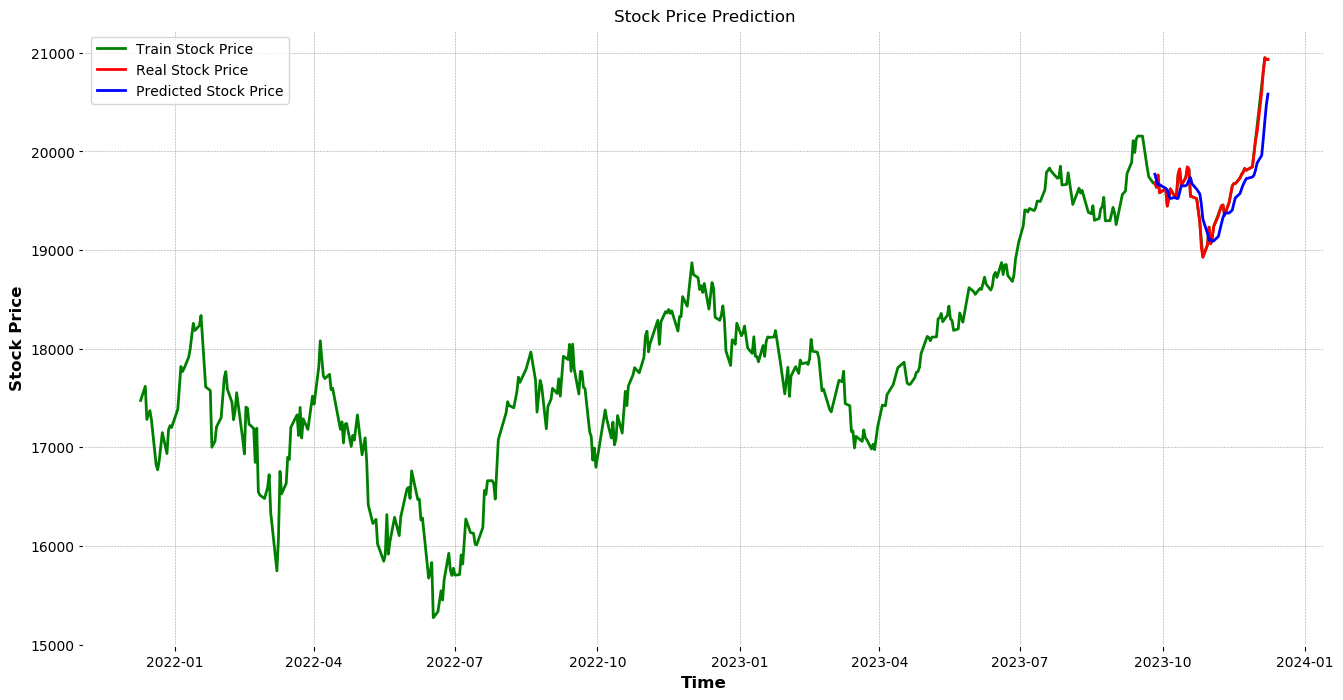

In [73]:
real_stock_price = test_data.iloc[:,0:1].values
combine = pd.concat((train_data['Open'], test_data['Open']), axis = 0)

test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
mse14 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse14))
mae14 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae14))
rmse14 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse14))
r214 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r214))

MSE: 59893.67680870056
MAE: 186.6505078125
RMSE: 244.7318467398564
R2 Score: 0.7233153663298786


# CNN + LSTM

In [75]:

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.25))

model.add(LSTM(units=50))
model.add(Dropout(0.25))


model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mean_squared_error')


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 32)             128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 32)             0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 2, 32)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 2, 50)             16600     
_________________________________________________________________
dropout_17 (Dropout)         (None, 2, 50)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 2, 50)             20200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 2, 50)            

In [76]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
14/14 [==============================] - 3s 6ms/step - loss: 0.2502
Epoch 2/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0813
Epoch 3/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0327
Epoch 4/40
14/14 [==============================] - 0s 3ms/step - loss: 0.0264
Epoch 5/40
14/14 [==============================] - 0s 4ms/step - loss: 0.0184
Epoch 6/40
14/14 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 7/40
14/14 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 8/40
14/14 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 9/40
14/14 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 10/40
14/14 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 11/40
14/14 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 12/40
14/14 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 13/40
14/14 [==============================

In [77]:
mse15 = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse12))
mae15 = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae12))
rmse15 = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse12))
r215 = r2_score(real_stock_price, predicted_stock_price)
print('R2 Score: ' + str(r215))

MSE: 300694.95006103517
MAE: 455.9571875
RMSE: 548.3565902412728
R2 Score: 0.7233153663298786


# Comparison

In [78]:


results = {
    'R-squared': [r2, r21, r22, r23, r24, r25, r26, r27, r28, r29, r210, r211,r212,r213,r214,r215],
    'Mean Squared Error': [mse, mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8, mse9, mse10, mse11, mse12, mse13, mse14, mse15],
    'Mean Absolute Error': [mae, mae1, mae2, mae3, mae4, mae5, mae6, mae7, mae8, mae9, mae10, mae11, mae12, mae13, mae14, mae15],
    'Root Mean Squared Error': [rmse, rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7, rmse8, rmse9, rmse10, rmse11, rmse12, rmse13, rmse14, rmse15]
}


index = ['SVM','KNN','Decision Tree','Random Forest','Gradient Boosting','Adaboost','Naive Bayes','Linear Regression','ANN','Voting Classifier','Stacking Classifier','RNN','LSTM','GRU','BiLSTM','CNN-LSTM']

In [79]:
results =pd.DataFrame(results,index=index)

In [80]:
print(results)

                     R-squared  Mean Squared Error  Mean Absolute Error  \
SVM                   0.705873        63669.437448           171.712683   
KNN                   0.768408        50132.480360           156.675078   
Decision Tree         0.884728        24952.843262           121.044758   
Random Forest         0.827340        37375.635649           159.814064   
Gradient Boosting     0.894132        22917.147613           114.410066   
Adaboost              0.872840        27526.280714           125.080202   
Naive Bayes           0.923407        16580.060556            97.030634   
Linear Regression     0.924192        16410.091854            96.602012   
ANN                   0.652502        75222.512429           204.624370   
Voting Classifier     0.910542        19364.801332           105.823006   
Stacking Classifier   0.925030        16228.744210            95.857658   
RNN                   0.643827        77100.518801           208.352852   
LSTM                 -0.3

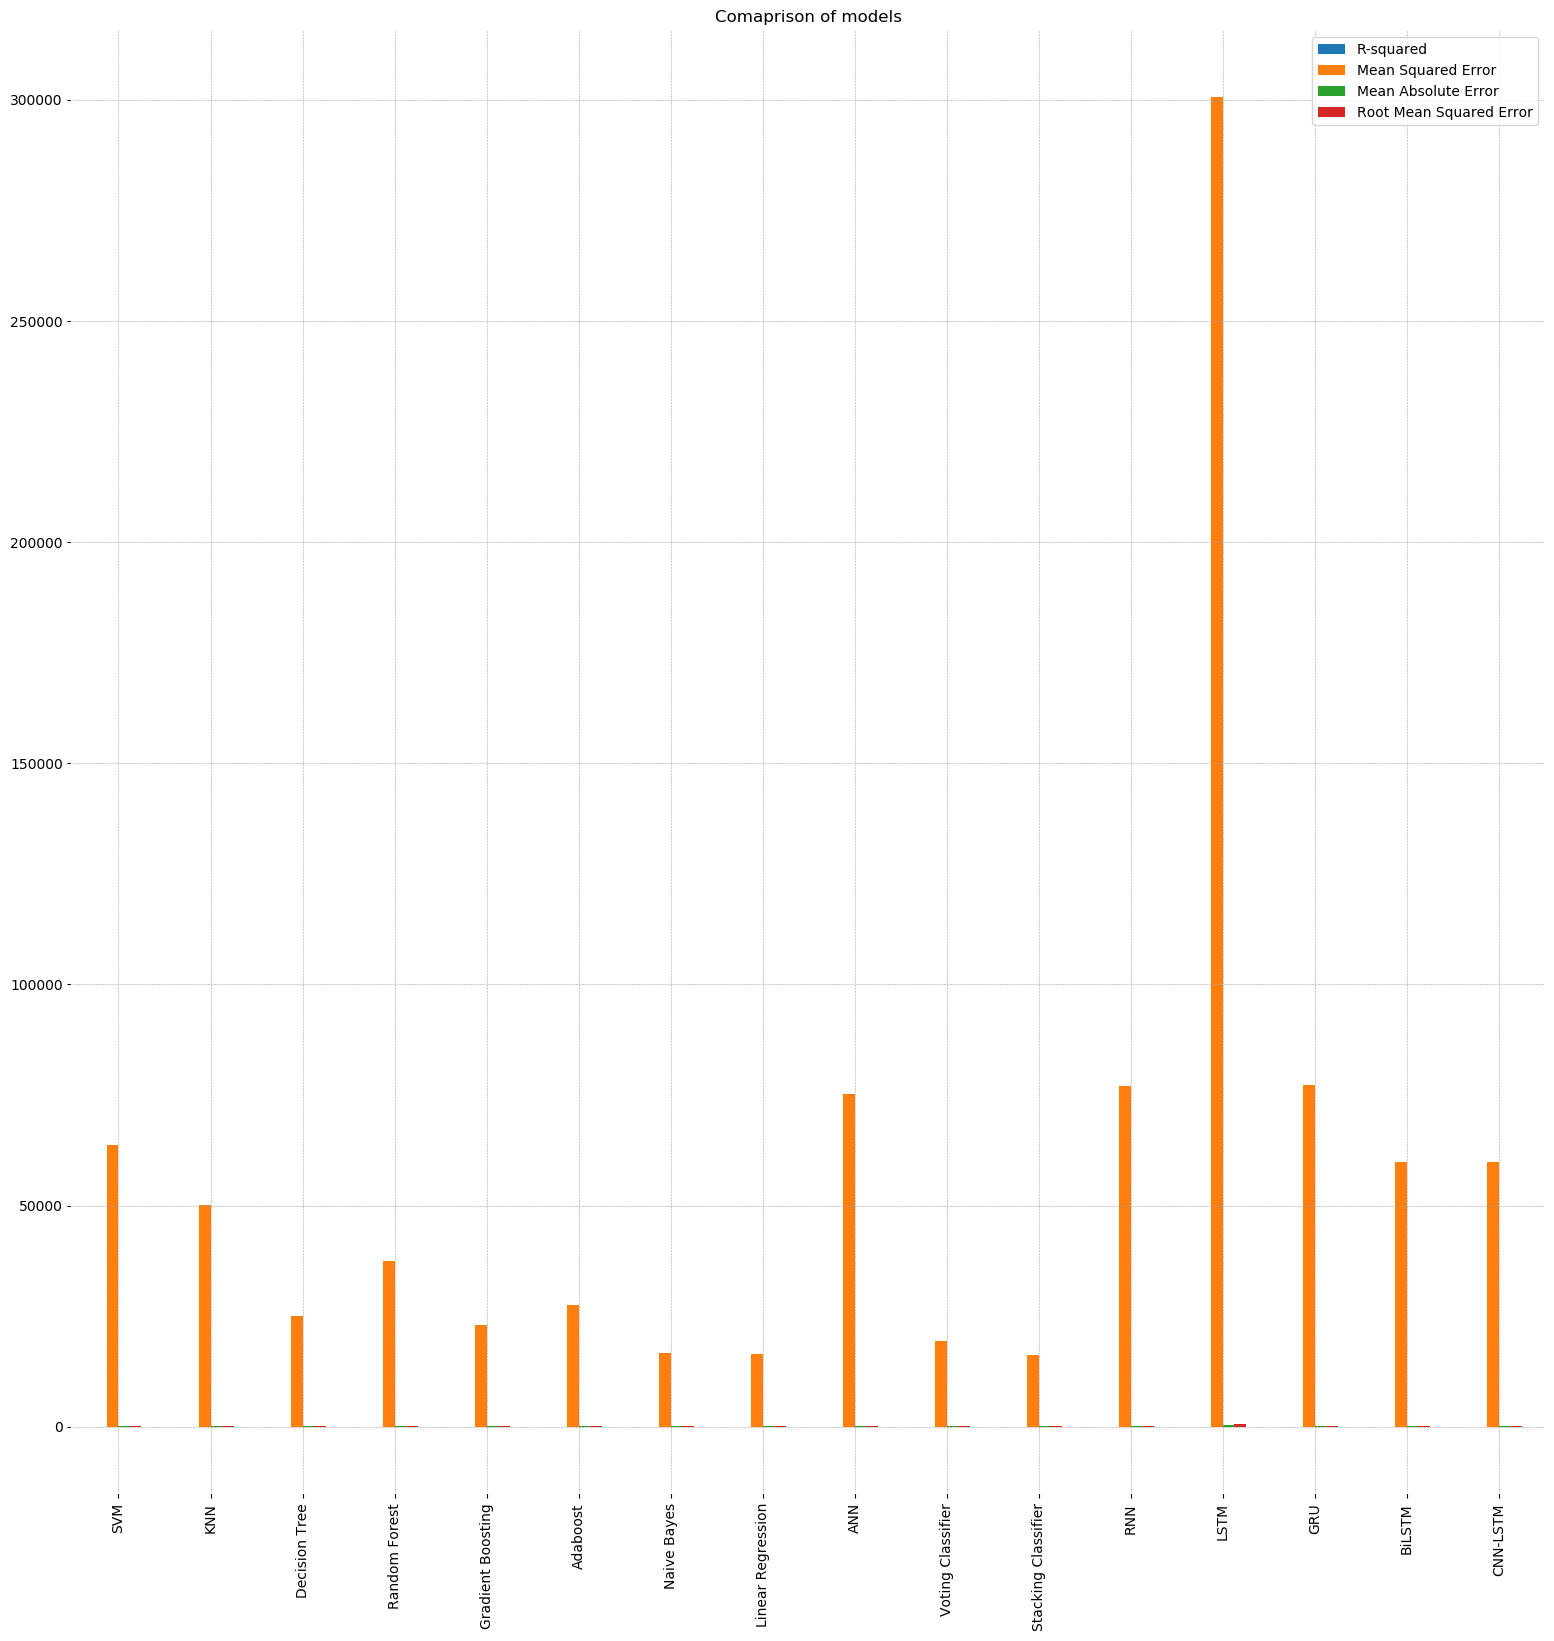

In [81]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

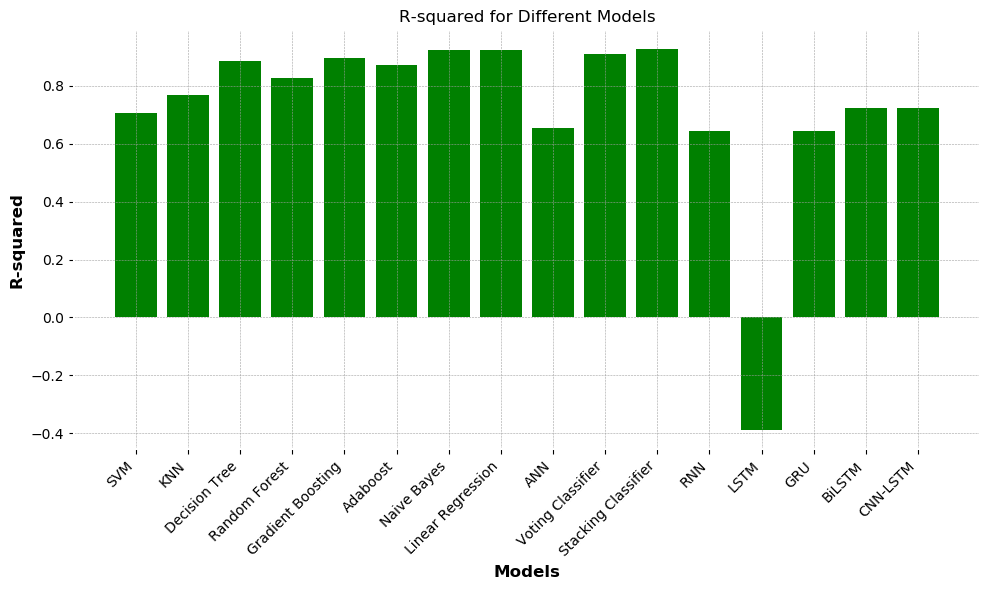

In [82]:
def visualize_metric(metric, color):
    plt.figure(figsize=(10, 6))
    plt.bar(index, results[metric], color=color)
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


visualize_metric('R-squared', 'green')

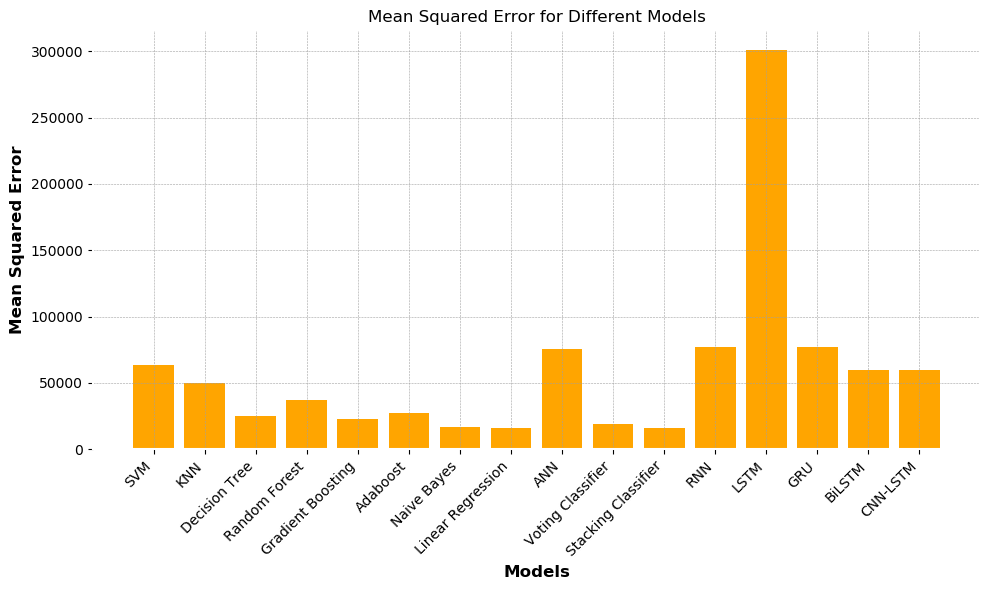

In [83]:



def visualize_metric(metric, color):
    plt.figure(figsize=(10, 6))
    plt.bar(index, results[metric], color=color)
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


visualize_metric('Mean Squared Error', 'orange')


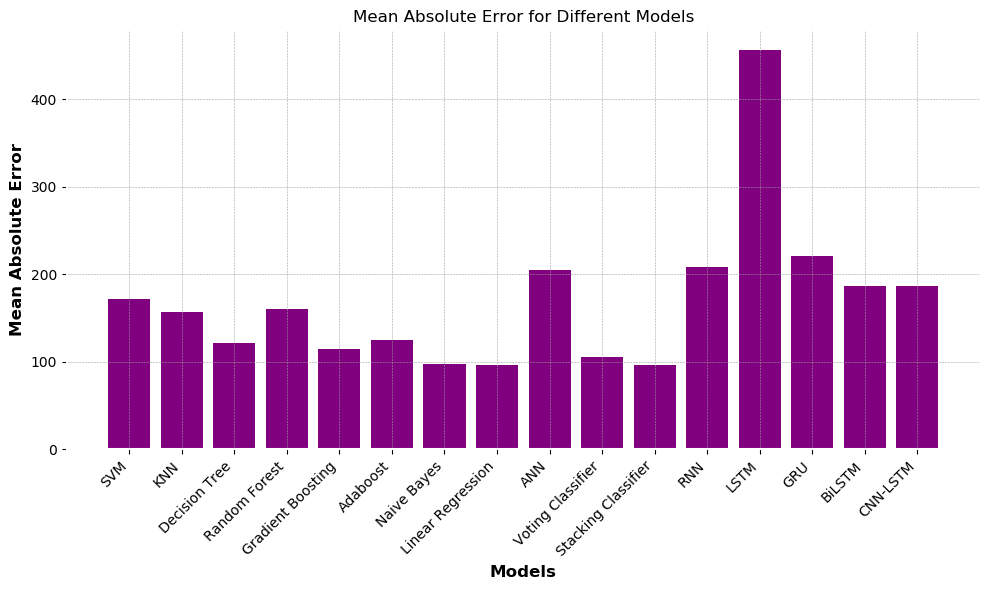

In [84]:
visualize_metric('Mean Absolute Error', 'purple')

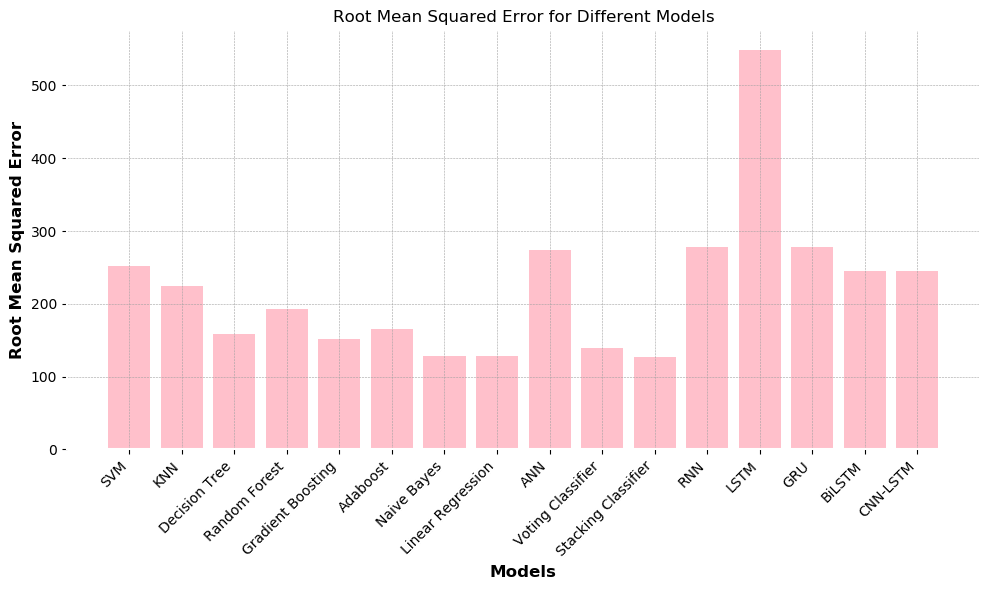

In [85]:
visualize_metric('Root Mean Squared Error', 'pink')

In [1]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


'c:\users\namitha' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
pip install mplfinance


Note: you may need to restart the kernel to use updated packages.


'c:\users\namitha' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
pip install --upgrade mplfinance

Note: you may need to restart the kernel to use updated packages.


'c:\users\namitha' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
pip install --upgrade mplfinance

Note: you may need to restart the kernel to use updated packages.


'c:\users\namitha' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
print("hello worls")

hello worls


In [3]:
pip install --upgrade mplfinance

Note: you may need to restart the kernel to use updated packages.


'c:\users\namitha' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import warnings 
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from math import sqrt
import numpy as np 
import pandas as pd 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
from pandas.plotting import lag_plot
from datetime import datetime
import time
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.pipeline import make_pipeline
import numpy as np
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout, SimpleRNN, GRU, Bidirectional
from pickle import load
from pandas.plotting import lag_plot
from pandas import DataFrame
from pandas import concat
import mplfinance as mpf
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
pip install Sequential

Note: you may need to restart the kernel to use updated packages.


'c:\users\namitha' is not recognized as an internal or external command,
operable program or batch file.
